In [63]:
using MatrixNetworks
using Distributions
using Gadfly
using Clustering
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using LinearAlgebra
using SphericalGraphEmbedding
using Random

### LFR benchmark
Loading data and random permute

In [64]:
# Loading data
community0 = readdlm("Data/LFRBenchmarks/LFR3/community.dat");
adj = readdlm("Data/LFRBenchmarks/LFR3/network.dat");

# converting to int array
community_true = community0[:,2];
community_true = convert(Array{Int64},community_true);

N = length(community_true);

# construct adjacency matrix
n_edge2 = size(adj)[1];
A = sparse(adj[:,1],adj[:,2],vec(ones(Int64,n_edge2,1)),N,N)

# largest connected component
A,_ = largest_component(A);
adj = 0; # clear memory

# random (unif) permutation
ind = randperm(N)
A = A[ind,ind];
community_true = community_true[ind];

Embed and cluster

In [87]:
# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-8;

# number of columns of initial guess
r = 40;

# number of centroids thrown in embedding
n_clusters = 10;

# nb of times vector partition is repeated
n_it_vec_part = 10;

# nb updates vec part
n_updates = 100; # by default

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, r);

# normalized multual information
nmi = mutualinfo(community_true,community)
println("NMI with ground truth: ", nmi)

# beware run twice to get timings without compilation time

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 95 iterations
  0.593667 seconds (2.64 k allocations: 521.855 MiB, 12.61% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 40
Number of updates: 11
Number of communities: 5
Modularity: 0.5745698945325598
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.4547494507528623, 0.39049785959154604, 0.1547470485316312, 5.6288208162695804e-6, 3.586257055153222e-9]
 -------------------------------------------- 
  0.838437 seconds (490.50 k allocations: 703.010 MiB, 10.50% gc time)
NMI with ground truth: 1.0


Plotting coordinates 1-2

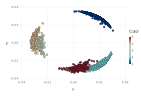

In [75]:
# Plotting 2D-projection
plot(x=x_embed[1,:],y=x_embed[2,:], color = community)
# the colors are the retreived communities

Plotting coordinates 2-3

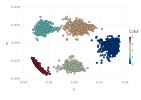

In [76]:
plot(x=x_embed[2,:],y=x_embed[3,:], color = community)

### Power EU graph
Loading data

In [88]:
m = readdlm("Data/PowerEU/ElistPowerEU.txt");
dim = size(m,1);

M_int = zeros(Int64,dim,2);
for i =1:dim
	for j=1:2
		M_int[i,j] = Int64(m[i,j]);
	end
end

N = maximum([maximum(M_int[:,1]),maximum(M_int[:,2])]);

A0 =spzeros(N,N);
A0 = sparse(M_int[:,1],M_int[:,2],vec(ones(Int64,dim,1)),N,N);
A0 = A0+A0';
A,p = largest_component(A0);

A0=0;p=0;m =0;

In [89]:
# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-10;

# number of columns of initial guess
r = 50;

# number of centroids thrown in embedding
n_clusters = 100;

# nb of times vector partition is repeated
n_it_vec_part = 1000;

# nb updates vec part
n_updates = 100; # by default

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, r)


# beware run twice to get timings without compilation time

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 467 iterations
  4.634725 seconds (13.72 k allocations: 4.268 GiB, 15.19% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 50
Number of updates: 2
Number of communities: 44
Modularity: 0.9103780312724321
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.5429306089883766, 0.3413836945508417, 0.11447891350772407, 0.000747814388911653, 0.00019551863039811155]
 -------------------------------------------- 
 87.980761 seconds (22.13 M allocations: 20.051 GiB, 6.82% gc time)


([-0.014906603604760846 -0.01473531707398406 … 0.006735111515337661 0.005894655689668506; -0.003999915688765652 -0.004801661808705797 … 0.031704798628941315 0.03196427277508058; … ; -0.0031615140594574696 -0.004776404312174265 … 0.022125495787202923 0.03581647399126085; -0.0019023505705216255 -0.005634277049263553 … -0.00019807393108468187 -0.0031343510925614165], [1, 1, 2, 2, 2, 1, 1, 3, 4, 4  …  38, 38, 38, 38, 38, 38, 38, 38, 38, 38])

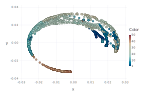

In [55]:
# Plotting 2D-projection
plot(x=x_embed[1,:],y=x_embed[2,:], color = community)
# the colors are the retreived communities

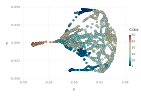

In [56]:
plot(x=x_embed[2,:],y=x_embed[3,:], color = community)